In [131]:
# pip install
!pip install -r requirements.txt

# Imports
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use(['science','no-latex'])
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from pprint import pprint
import time

# Module imports
from periodic_table import *
from utils import *
print("Imported all.")
DPI = 800

Imported all.


# Open data files

In [132]:
# original, NC, FTFP
physic_model = "shielding_5cm"

# Open propmt TPC data file
file_dir = f"./assets/{physic_model}/A_Z_count-TPC_prompt.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_TPC_prompt = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_TPC_prompt)
# Reorder columns
df_TPC_prompt = df_TPC_prompt[["Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life (s)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

Considered delayed if created at time > 20 microseconds

In [133]:
# Open delayed TPC data file
file_dir = f"./assets/{physic_model}/A_Z_count-TPC_delayed.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_TPC_delayed = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_TPC_delayed)
# Reorder columns
df_TPC_delayed = df_TPC_delayed[["Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life (s)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

In [134]:
# Open all TPC data file
file_dir = f"./assets/{physic_model}/A_Z_count-TPC.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_TPC = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_TPC)
# Reorder columns
df_TPC = df_TPC[["Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life (s)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour"]]

In [135]:
# Open buffer data file
file_dir = f"./assets/{physic_model}/A_Z_count-buffers.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_buffers = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_buffers)
# Reorder columns
df_buffers = df_buffers[["Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life (s)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

# Preprocessing

### Add Production (/yr)

In [136]:
# Simulation length = years * nanoseconds
year_in_nano = (3.154 * 10**16)
year_in_sec = (3.154 * 10**7)
day_in_sec = 86400
### VARY THIS ###
muon_no = 10 ** 8
muon_flux = 3.447 * 10 ** 6 # per year
sim_length = muon_no / muon_flux
print(f"Simulation length (yr): {sim_length}")

df_buffers["Production (/yr)"] = df_buffers["Counts"] / sim_length
df_TPC_prompt["Production (/yr)"] = df_TPC_prompt["Counts"] / sim_length
df_TPC_delayed["Production (/yr)"] = df_TPC_delayed["Counts"] / sim_length
# Yield per muon
df_buffers["Yield per Muon (/yr)"] = df_buffers["Counts"] / muon_no
df_TPC_prompt["Yield per Muon (/yr)"] = df_TPC_prompt["Counts"] / muon_no
df_TPC_delayed["Yield per Muon (/yr)"] = df_TPC_delayed["Counts"] / muon_no

Simulation length (yr): 29.01073397156948


### Create unstable dfs

In [137]:
unstable_buffers = df_buffers[df_buffers["Stable"] == False]
unstable_TPC_prompt = df_TPC_prompt[df_TPC_prompt["Stable"] == False]
unstable_TPC_delayed = df_TPC_delayed[df_TPC_delayed["Stable"] == False]

### Print Information

In [138]:
print("Buffers:")
print(f"No: {len(df_buffers)}")
print(f"Total Counts: {df_buffers['Counts'].sum()}")
print(f"Total Production (yr): {df_buffers['Production (/yr)'].sum()}")
print(f"Number of stable isotopes: {len(df_buffers) - len(unstable_buffers)}")
print(f"Number of unstable isotopes: {len(unstable_buffers)}")
print()
print("TPC Prompt:")
print(f"No: {len(df_TPC_prompt)}")
print(f"Total Counts: {df_TPC_prompt['Counts'].sum()}")
print(f"Total Production (yr): {df_TPC_prompt['Production (/yr)'].sum()}")
print(f"Number of stable isotopes: {len(df_TPC_prompt) - len(unstable_TPC_prompt)}")
print(f"Number of unstable isotopes: {len(unstable_TPC_prompt)}")
print()
print("TPC Delayed:")
print(f"No: {len(df_TPC_delayed)}")
print(f"Total Counts: {df_TPC_delayed['Counts'].sum()}")
print(f"Total Production (yr): {df_TPC_delayed['Production (/yr)'].sum()}")
print(f"Number of stable isotopes: {len(df_TPC_delayed) - len(unstable_TPC_delayed)}")
print(f"Number of unstable isotopes: {len(unstable_TPC_delayed)}")

Buffers:
No: 181
Total Counts: 24590289
Total Production (yr): 847627.26183
Number of stable isotopes: 41
Number of unstable isotopes: 140

TPC Prompt:
No: 171
Total Counts: 5872950
Total Production (yr): 202440.58650000006
Number of stable isotopes: 40
Number of unstable isotopes: 131

TPC Delayed:
No: 92
Total Counts: 7574887
Total Production (yr): 261106.35489000005
Number of stable isotopes: 38
Number of unstable isotopes: 54


### Filter by realistic half-life

Find max and min half lifes

In [139]:
print("Buffers:")
print(f"Min half life (sec): {unstable_buffers['Half Life (s)'].min()}\nMax half life (day): {unstable_buffers['Half Life (s)'].max() / day_in_sec}")
print("TPC Prompt:")
print(f"Min half life (sec): {unstable_TPC_prompt['Half Life (s)'].min()}\nMax half life (day): {unstable_TPC_prompt['Half Life (s)'].max() / day_in_sec}")
print("TPC Delayed:")
print(f"Min half life (sec): {unstable_TPC_delayed['Half Life (s)'].min()}\nMax half life (day): {unstable_TPC_delayed['Half Life (s)'].max() / day_in_sec}")

Buffers:
Min half life (sec): 0.0
Max half life (day): 1.0960648148148148e+24
TPC Prompt:
Min half life (sec): 0.0
Max half life (day): 1.0960648148148148e+24
TPC Delayed:
Min half life (sec): 7.91e-22
Max half life (day): 1.0960648148148148e+24


In [140]:
# year * days * seconds
upper_lim = 1 * 356 * day_in_sec
print(f"Removing isotopes with decay time longer than: {upper_lim}s")
unstable_buffers_rem = unstable_buffers[unstable_buffers["Half Life (s)"] > upper_lim].sort_values("Half Life (s)")
unstable_TPC_prompt_rem = unstable_TPC_prompt[unstable_TPC_prompt["Half Life (s)"] > upper_lim].sort_values("Half Life (s)")
unstable_TPC_delayed_rem = unstable_TPC_delayed[unstable_TPC_delayed["Half Life (s)"] > upper_lim].sort_values("Half Life (s)")
#print("Removed isotopes:")
#print(unstable_buffers_rem)
#print(unstable_TPC_prompt_rem)
#print(unstable_TPC_delayed_rem)

Removing isotopes with decay time longer than: 30758400s


In [141]:
unstable_buffers = unstable_buffers[unstable_buffers["Half Life (s)"] < upper_lim].sort_values("Half Life (s)")
unstable_TPC_prompt = unstable_TPC_prompt[unstable_TPC_prompt["Half Life (s)"] < upper_lim].sort_values("Half Life (s)")
unstable_TPC_delayed = unstable_TPC_delayed[unstable_TPC_delayed["Half Life (s)"] < upper_lim].sort_values("Half Life (s)")
print(f"Difference:")
print(f"Buffers: {len(unstable_buffers_rem)}")
print(f"TPC Prompt: {len(unstable_TPC_prompt_rem)}")
print(f"TPC Delayed: {len(unstable_TPC_delayed_rem)}")
important_long_lived = pd.concat([unstable_buffers_rem, unstable_TPC_prompt_rem, unstable_TPC_delayed_rem]).sort_values("Atomic Number", ascending=False).reset_index(drop=True)
important_long_lived

Difference:
Buffers: 12
TPC Prompt: 12
TPC Delayed: 7


,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (s),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr),Yield per Muon (/yr)
0,Ca 20-40,20,40,2236,2.951859e-04,False,9.470000e+28,"[[2EC, None, 0.0]]",NaN,red,77.0749,2.236e-05
1,Ca 20-41,20,41,7,2.846652e-07,False,3.220000e+12,"[[EC, 1.0, 0.421]]",0.421,red,0.24129,7e-08
2,Ca 20-40,20,40,1,1.702722e-07,False,9.470000e+28,"[[2EC, None, 0.0]]",NaN,red,0.03447,1e-08
3,Ca 20-40,20,40,4713,1.916610e-04,False,9.470000e+28,"[[2EC, None, 0.0]]",NaN,red,162.457,4.713e-05
4,Ca 20-41,20,41,2,3.405444e-07,False,3.220000e+12,"[[EC, 1.0, 0.421]]",0.421,red,0.06894,2e-08
5,K 19-40,19,40,5374,2.185416e-04,False,3.940000e+16,"[[B-, 0.8928, 1.311], [EC, 0.1072, 1.505]]",1.505,red,185.242,5.374e-05
6,K 19-40,19,40,2520,4.290859e-04,False,3.940000e+16,"[[B-, 0.8928, 1.311], [EC, 0.1072, 1.505]]",1.505,red,86.8644,2.52e-05
7,Ar 18-39,18,39,1184938,2.017620e-01,False,8.490000e+09,"[[B-, 1.0, 0.565]]",0.565,red,40844.8,0.0118494
8,Ar 18-42,18,42,20,8.133292e-07,False,1.040000e+09,"[[B-, 1.0, 0.599]]",0.599,red,0.6894,2e-07
9,Ar 18-39,18,39,2766143,1.124892e-01,False,8.490000e+09,"[[B-, 1.0, 0.565]]",0.565,red,95348.9,0.0276614


# TPC ALL

In [142]:
df_TPC_unstable = df_TPC[df_TPC["Stable"] == False]
df_TPC_unstable["Production (/yr)"] = df_TPC_unstable["Counts"] / sim_length
#df_TPC_unstable = df_TPC_unstable[df_TPC_unstable["Half Life (s)"] < upper_lim].sort_values("Half Life (s)")
df_TPC_unstable["Yield per Muon (/yr)"] = df_TPC_unstable["Counts"] / muon_no
df_TPC_unstable = df_TPC_unstable[df_TPC_unstable["Production (/yr)"] > 0.5]

# Total ratios of prompt to delayed counts

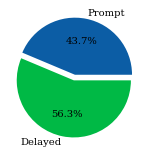

7574887

In [143]:
plt.pie(x=[df_TPC_prompt["Counts"].sum(), df_TPC_delayed["Counts"].sum()], autopct='%1.1f%%', explode=[0, 0.1], labels=["Prompt", "Delayed"])
plt.savefig('./img/prompt-delayed.png', dpi=DPI)
plt.show()
df_TPC_delayed["Counts"].sum()

# Total ratio of counts in TPC to buffer 

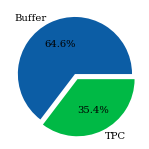

In [144]:
plt.pie(x=[df_buffers["Counts"].sum(), df_TPC_delayed["Counts"].sum() + df_TPC_prompt["Counts"].sum()], explode=[0, 0.1], autopct='%1.1f%%', labels=["Buffer", "TPC"])
plt.savefig('./img/tpc-to-buffer.png', dpi=DPI)
plt.show()

### Add beta decay energy columns

In [145]:
# https://nds.iaea.org/relnsd/vcharthtml/api_v0_notebook.html
# https://nds.iaea.org/relnsd/vcharthtml/api_v0_guide.html#gamma
# https://nds.iaea.org/relnsd/vcharthtml/VChartHTML.html
#!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
import time

# the service URL
livechart = "https://nds.iaea.org/relnsd/v0/data?"

import urllib.request

def lc_read_csv(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))

def gamma_dec(iso_sym):
    """Calculates average gamma decay - depreciated"""
    sym = iso_sym.split(" ")[0].lower()
    A = iso_sym.split(" ")[1].split("-")[1]
    df = lc_read_csv(livechart + f"fields=decay_rads&nuclides={str(A)+sym}&rad_types=g")
    if not df.empty:
        try:
            average = (df["energy"] * df["intensity"]/100).sum()
            return average
        except:
            pass
    return None

def g_in_range(iso_sym, min_e, max_e, found_e_range, rad_type):
    "Returns True if gamma found in range else False"
    if rad_type == "bm":
        energy_title = "mean_energy"
    else:
        energy_title = "energy"
    sym = iso_sym.split(" ")[0].lower()
    A = iso_sym.split(" ")[1].split("-")[1]
    df = lc_read_csv(livechart + f"fields=decay_rads&nuclides={str(A)+sym}&rad_types={rad_type}")
    ### IMPORTANT ###
    threshhold_intensity = 0.5
    time.sleep(0.02)
    if not df.empty:
        try:
            df = df[df["intensity_beta"] > threshhold_intensity]
            if df[energy_title].max() > found_e_range[1]:
                found_e_range[1] = df[energy_title].max()
            if df[energy_title].min() < found_e_range[0]:
                found_e_range[0] = df[energy_title].min()
            if df[energy_title].between(min_e,max_e).any():
                return True
        except:
            return np.nan
    return False

Get specific data

In [146]:
A = 41
sym = "ar"
# a bp bm g e x (α, β-, β+ and electron capture, γ, Auger and conversion electron, X-ray)
df = lc_read_csv(livechart + f"fields=decay_rads&nuclides={str(A)+sym}&rad_types=bm")
# df

Add decay columns

In [147]:
min_b_e = 0
max_b_e = 100
found_e_range = [np.inf,0]
rad_type = "bm"
beta_col_name = f"BDecay {min_b_e}-{max_b_e} (keV)"
unstable_TPC_delayed[beta_col_name] = unstable_TPC_delayed.apply(lambda x : g_in_range(x["Iso Symbol"], min_b_e, max_b_e, found_e_range, rad_type), axis = 1)
unstable_TPC_prompt[beta_col_name] = unstable_TPC_prompt.apply(lambda x : g_in_range(x["Iso Symbol"], min_b_e, max_b_e, found_e_range, rad_type), axis = 1)
unstable_buffers[beta_col_name] = unstable_buffers.apply(lambda x : g_in_range(x["Iso Symbol"], min_b_e, max_b_e, found_e_range, rad_type), axis = 1)
print(f"Decay beta energy range (min/max) {found_e_range[0]}-{found_e_range[1]} keV")

Decay beta energy range (min/max) 48.758-10048 keV


In [148]:
# For TPC ALL
beta_col_name = f"BDecay {min_b_e}-{max_b_e} (keV)"
df_TPC_unstable[beta_col_name] = df_TPC_unstable.apply(lambda x : g_in_range(x["Iso Symbol"], min_b_e, max_b_e, found_e_range, rad_type), axis = 1)

In [149]:
df_TPC_unstable[pd.isnull(df_TPC_unstable[beta_col_name]) | (df_TPC_unstable[beta_col_name] == True)].sort_values("Counts", ascending=False).reset_index(drop=True)

,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (s),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr),Yield per Muon (/yr),BDecay 0-100 (keV)
0,H 1-3,1,3,203503,0.015133,False,3.890000e+08,"[[B-, 1.0, 0.019]]",0.019,red,7014.75,0.00203503,True
1,S 16-35,16,35,58979,0.004386,False,7.550000e+06,"[[B-, 1.0, 0.167]]",0.167,red,2033.01,0.00058979,True
2,P 15-33,15,33,15675,0.001166,False,2.190000e+06,"[[B-, 1.0, 0.249]]",0.249,red,540.317,0.00015675,True
3,S 16-38,16,38,7096,0.000528,False,1.020000e+04,"[[B-, 1.0, 2.937]]",2.937,red,244.599,7.096e-05,True
4,Si 14-32,14,32,4855,0.000361,False,4.830000e+09,"[[B-, 1.0, 0.224]]",0.224,red,167.352,4.855e-05,True
5,C 6-14,6,14,480,0.000036,False,1.800000e+11,"[[B-, 1.0, 0.156]]",0.156,red,16.5456,4.8e-06,True
6,Mg 12-28,12,28,429,0.000032,False,7.530000e+04,"[[B-, 1.0, 1.832]]",1.832,red,14.7876,4.29e-06,True
7,Si 14-34,14,34,252,0.000019,False,2.770000e+00,"[[B-, 1.0, 4.601]]",4.601,red,8.68644,2.52e-06,NaN


In [150]:
df_TPC_unstable.sort_values("Atomic Number")

,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (s),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr),Yield per Muon (/yr),BDecay 0-100 (keV)
0,H 1-3,1,3,203503,0.015133,False,3.890000e+08,"[[B-, 1.0, 0.019]]",0.019,red,7014.75,0.00203503,True
1,H 1-4,1,4,662,0.000049,False,0.000000e+00,"[[N, 1.0, 2.88]]",2.880,red,22.8191,6.62e-06,False
7,He 2-6,2,6,1296,0.000096,False,8.010000e-01,"[[B-, 1.0, 3.508]]",3.508,red,44.6731,1.296e-05,False
10,He 2-7,2,7,21,0.000002,False,3.160000e-21,"[[N, None, 0.435]]",0.435,red,0.72387,2.1e-07,False
14,Li 3-8,3,8,438,0.000033,False,8.400000e-01,"[[B-, 1.0, 16.005], [BA, 1.0, 0.0]]",16.005,red,15.0979,4.38e-06,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Ar 18-41,18,41,1877615,0.139622,False,6.580000e+03,"[[B-, 1.0, 2.492]]",2.492,red,64721.4,0.0187761,False
166,K 19-42,19,42,55,0.000004,False,4.440000e+04,"[[B-, 1.0, 3.526]]",3.526,red,1.89585,5.5e-07,False
152,K 19-38,19,38,187,0.000014,False,4.580000e+02,"[[EC, 1.0, 5.914]]",5.914,red,6.44589,1.87e-06,False
159,K 19-40,19,40,2520,0.000187,False,3.940000e+16,"[[B-, 0.8928, 1.311], [EC, 0.1072, 1.505]]",1.505,red,86.8644,2.52e-05,False


# Look for important unstable in buffer
Can't really do this - need another geant4 simulation

# Look for important unstable prompt isotopes in TPC
Isotopes that are produced inside the deadtime, but will live long enough to decay outside this time and emit a detectable signal

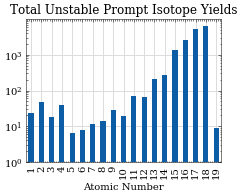

Number of isotopes in range: 107
Total Production (/yr): 16639.427339999995


,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (s),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr),Yield per Muon (/yr),BDecay 0-100 (keV)
0,Ar 18-41,18,41,94401,1.607386e-02,False,6580.000,"[[B-, 1.0, 2.492]]",2.492,red,3254,0.00094401,False
1,Ar 18-37,18,37,91423,1.556679e-02,False,3030000.000,"[[EC, 1.0, 0.814]]",0.814,red,3151.35,0.00091423,False
2,Cl 17-38,17,38,67864,1.155535e-02,False,2230.000,"[[B-, 1.0, 4.916]]",4.916,red,2339.27,0.00067864,False
3,Cl 17-39,17,39,67718,1.153049e-02,False,3370.000,"[[B-, 1.0, 3.442]]",3.442,red,2334.24,0.00067718,False
4,S 16-35,16,35,53750,9.152130e-03,False,7550000.000,"[[B-, 1.0, 0.167]]",0.167,red,1852.76,0.0005375,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Al 13-34,13,34,1,1.702722e-07,False,0.042,"[[B-, 1.0, 17.024], [BN, 0.27, 9.489]]",17.024,red,0.03447,1e-08,NaN
103,K 19-43,19,43,1,1.702722e-07,False,80300.000,"[[B-, 1.0, 1.815]]",1.815,red,0.03447,1e-08,False
104,Cl 17-41,17,41,1,1.702722e-07,False,38.400,"[[B-, 1.0, 5.76]]",5.760,red,0.03447,1e-08,NaN
105,O 8-22,8,22,1,1.702722e-07,False,2.250,"[[B-, 1.0, 6.491], [BN, 0.22, 1.26]]",6.491,red,0.03447,1e-08,False


In [151]:
# Filter with halflife greater than deadtime (lasts long enough)
important_TPC_prompt = unstable_TPC_prompt[unstable_TPC_prompt["Half Life (s)"] > 0.00002].sort_values("Production (/yr)", ascending=False).reset_index(drop=True)
# All unstable that beta decay with decays per year > 1
unstable_TPC_prompt_beta = unstable_TPC_prompt.sort_values(["Atomic Number", "Mass Number"], ascending=False).reset_index(drop=True)
unstable_TPC_prompt_grouped = unstable_TPC_prompt_beta.groupby(['Atomic Number'])["Production (/yr)"].sum()
ax = unstable_TPC_prompt_grouped.plot.bar(x="Atomic Number", log=True)
ax.grid(which='major', color='#dddddd', lw=1)
ax.set_axisbelow(True)
plt.title("Total Unstable Prompt Isotope Yields")
plt.show()
# Filter with beta energy ranges
# important_TPC_prompt = important_TPC_prompt[pd.isnull(important_TPC_prompt[beta_col_name]) | (important_TPC_prompt[beta_col_name] == True)]

print(f"Number of isotopes in range: {len(important_TPC_prompt)}")
print(f"Total Production (/yr): {important_TPC_prompt['Production (/yr)'].sum()}")
important_TPC_prompt.sort_values("Production (/yr)", ascending=False)

# Look for important unstable delayed isotopes in TPC

## Any isotopes that beta decay

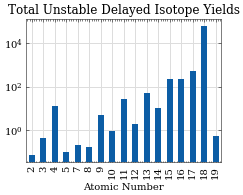

Number of isotopes in range: 1
Total Production (/yr): 16639.427339999995


,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (s),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr),Yield per Muon (/yr),BDecay 0-100 (keV)
0,K 19-42,19,42,5,6.600759e-07,False,4.440000e+04,"[[B-, 1.0, 3.526]]",3.526,red,0.17235,5e-08,False
1,K 19-38,19,38,10,1.320152e-06,False,4.580000e+02,"[[EC, 1.0, 5.914]]",5.914,red,0.3447,1e-07,False
2,Ar 18-41,18,41,1783214,2.354113e-01,False,6.580000e+03,"[[B-, 1.0, 2.492]]",2.492,red,61467.4,0.0178321,False
3,Ar 18-37,18,37,48260,6.371052e-03,False,3.030000e+06,"[[EC, 1.0, 0.814]]",0.814,red,1663.52,0.0004826,False
4,Cl 17-39,17,39,586,7.736089e-05,False,3.370000e+03,"[[B-, 1.0, 3.442]]",3.442,red,20.1994,5.86e-06,False
5,Cl 17-38,17,38,14646,1.933494e-03,False,2.230000e+03,"[[B-, 1.0, 4.916]]",4.916,red,504.848,0.00014646,False
6,Cl 17-34,17,34,113,1.491771e-05,False,1.530000e+00,"[[EC, 1.0, 5.492]]",5.492,red,3.89511,1.13e-06,False
7,S 16-38,16,38,169,2.231056e-05,False,1.020000e+04,"[[B-, 1.0, 2.937]]",2.937,red,5.82543,1.69e-06,True
8,S 16-37,16,37,912,1.203978e-04,False,3.030000e+02,"[[B-, 1.0, 4.865]]",4.865,red,31.4366,9.12e-06,False
9,S 16-35,16,35,5229,6.903073e-04,False,7.550000e+06,"[[B-, 1.0, 0.167]]",0.167,red,180.244,5.229e-05,True


In [152]:
# All unstable that beta decay with decays per year > 1
unstable_TPC_delayed_beta = unstable_TPC_delayed.sort_values(["Atomic Number", "Mass Number"], ascending=False).reset_index(drop=True)
unstable_TPC_delayed_grouped = unstable_TPC_delayed_beta.groupby(['Atomic Number'])["Production (/yr)"].sum()
ax = unstable_TPC_delayed_grouped.plot.bar(x="Atomic Number", log=True)
ax.grid(which='major', color='#dddddd', lw=1)
ax.set_axisbelow(True)
plt.title("Total Unstable Delayed Isotope Yields")
plt.show()
print(f"Number of isotopes in range: {len(important_TPC_delayed)}")
print(f"Total Production (/yr): {important_TPC_prompt['Production (/yr)'].sum()}")
unstable_TPC_delayed_beta.head(70)

## Filter with high probability for beta emission in range

In [153]:
# Filter with beta energy ranges
important_TPC_delayed = unstable_TPC_delayed[pd.isnull(unstable_TPC_delayed[beta_col_name]) | (unstable_TPC_delayed[beta_col_name] == True)].sort_values("Counts", ascending=False).reset_index(drop=True)

print(f"Number of isotopes in range: {len(important_TPC_delayed)}")
print(f"Total Production (yr): {important_TPC_delayed['Production (/yr)'].sum()}\n")

print(f"Beta decays: {len(important_TPC_delayed[important_TPC_delayed[beta_col_name] == True])}")
print(f"Beta decay productions (/yr): {important_TPC_delayed.loc[important_TPC_delayed[beta_col_name] == True, 'Production (/yr)'].sum()}\n")

Number of isotopes in range: 5
Total Production (yr): 207.44046

Beta decays: 4
Beta decay productions (/yr): 207.26811



In [154]:
file_dir = f"./assets/{physic_model}/important_iso.csv"
important_TPC_delayed.to_csv(file_dir)
important_TPC_delayed

,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (s),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr),Yield per Muon (/yr),BDecay 0-100 (keV)
0,S 16-35,16,35,5229,6.903073e-04,False,7550000.00,"[[B-, 1.0, 0.167]]",0.167,red,180.244,5.229e-05,True
1,P 15-33,15,33,610,8.052925e-05,False,2190000.00,"[[B-, 1.0, 0.249]]",0.249,red,21.0267,6.1e-06,True
2,S 16-38,16,38,169,2.231056e-05,False,10200.00,"[[B-, 1.0, 2.937]]",2.937,red,5.82543,1.69e-06,True
3,Si 14-34,14,34,5,6.600759e-07,False,2.77,"[[B-, 1.0, 4.601]]",4.601,red,0.17235,5e-08,NaN
4,Mg 12-28,12,28,5,6.600759e-07,False,75300.00,"[[B-, 1.0, 1.832]]",1.832,red,0.17235,5e-08,True


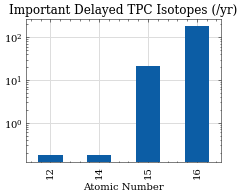

In [155]:
important_TPC_delayed_groups = important_TPC_delayed.groupby(['Atomic Number'])["Production (/yr)"].sum()
ax = important_TPC_delayed_groups.plot.bar(x="Atomic Number", log=True)
ax.grid(which='major', color='#dddddd', lw=1)
ax.set_axisbelow(True)
plt.title("Important Delayed TPC Isotopes (/yr)")
plt.show()

# Combine df and convert to latex

In [156]:
df_TPC_unstable

,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (s),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr),Yield per Muon (/yr),BDecay 0-100 (keV)
0,H 1-3,1,3,203503,0.015133,False,3.890000e+08,"[[B-, 1.0, 0.019]]",0.019,red,7014.75,0.00203503,True
1,H 1-4,1,4,662,0.000049,False,0.000000e+00,"[[N, 1.0, 2.88]]",2.880,red,22.8191,6.62e-06,False
7,He 2-6,2,6,1296,0.000096,False,8.010000e-01,"[[B-, 1.0, 3.508]]",3.508,red,44.6731,1.296e-05,False
10,He 2-7,2,7,21,0.000002,False,3.160000e-21,"[[N, None, 0.435]]",0.435,red,0.72387,2.1e-07,False
14,Li 3-8,3,8,438,0.000033,False,8.400000e-01,"[[B-, 1.0, 16.005], [BA, 1.0, 0.0]]",16.005,red,15.0979,4.38e-06,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Ar 18-41,18,41,1877615,0.139622,False,6.580000e+03,"[[B-, 1.0, 2.492]]",2.492,red,64721.4,0.0187761,False
152,K 19-38,19,38,187,0.000014,False,4.580000e+02,"[[EC, 1.0, 5.914]]",5.914,red,6.44589,1.87e-06,False
159,K 19-40,19,40,2520,0.000187,False,3.940000e+16,"[[B-, 0.8928, 1.311], [EC, 0.1072, 1.505]]",1.505,red,86.8644,2.52e-05,False
166,K 19-42,19,42,55,0.000004,False,4.440000e+04,"[[B-, 1.0, 3.526]]",3.526,red,1.89585,5.5e-07,False


In [157]:
# important_combined = pd.concat([important_TPC_prompt.sort_values("Counts", ascending=False),
#                                important_long_lived, important_TPC_delayed.sort_values("Counts", ascending=False),
#                                unstable_TPC_delayed_beta.sort_values("Counts", ascending=False)]).reset_index(drop=True)
important_combined = df_TPC_unstable.sort_values("Counts", ascending=False).reset_index(drop=True).copy()

def convert_iso(symbol):
    if symbol:
        name, nums = symbol.split(" ")
        num = nums.split("-")[1]
        return "$^{"+ str(num) + "}$" + str(name)

def convert_decays(decays):
    output = ""
    for decay in decays:
        if decay:
            if decay[0] == "B-":
                output = output + "$\ beta$-, "
            elif decay[0] == "B+":
                output = output + "$\ beta$+, "
            elif decay[0] == "A":
                output = output + "$\ alpha$, "
            elif decay[0] == "BA":
                output = output + "$\ beta$-$\ alpha$, "
            elif decay[0] == "BN":
                output = output + "$\ beta$-N, "
            elif decay[0] == "B3A":
                output = output + "$\ beta$-3$\ alpha$, "
            else:
                output = output + str(decay[0]) + ", "
    return output[:-2]
important_combined["Iso Symbol"] = important_combined.apply(lambda x : convert_iso(x["Iso Symbol"]), axis = 1)
important_combined["Decay Modes (m, b, q MeV)"] = important_combined.apply(lambda x : convert_decays(x["Decay Modes (m, b, q MeV)"]), axis = 1)

a = len(important_TPC_prompt)
b = len(important_long_lived)
c = len(important_TPC_delayed)
d = len(unstable_TPC_delayed_beta)

print("\nSums:")
print(f"Sum Total: {round(important_combined['Production (/yr)'].sum(), 3)}, {important_combined['Yield per Muon (/yr)'].sum()}")
print(f"Sum TPC: {round(important_combined.loc[0 : a, 'Production (/yr)'].sum(), 3)}, {important_combined.loc[0 : a, 'Yield per Muon (/yr)'].sum()}")
print(f"Sum Long lived: {round(important_combined.loc[a : a + b, 'Production (/yr)'].sum(), 3)}, {important_combined.loc[a : a + b, 'Yield per Muon (/yr)'].sum()}")
print(f"Sum Delayed: {round(important_combined.loc[a + b : a + b + c, 'Production (/yr)'].sum(), 3)}, {important_combined.loc[a + b : a + b + c, 'Yield per Muon (/yr)'].sum()}")
print(f"Sum Delayed: {round(important_combined.loc[a + b + c : a + b + c + d, 'Production (/yr)'].sum(), 3)}, {important_combined.loc[a + b + c : a + b + c + d, 'Yield per Muon (/yr)'].sum()}")

important_combined = important_combined[["Iso Symbol", "Production (/yr)", "Yield per Muon (/yr)", "Half Life (s)", "Decay Modes (m, b, q MeV)"]]
important_combined['Production (/yr)'] = important_combined['Production (/yr)'].map('{:.3f}'.format)
important_combined['Production (/yr)'] = important_combined['Production (/yr)'].map(float)
important_combined["Yield per Muon (/yr)"] = important_combined["Yield per Muon (/yr)"].map("{:.2E}".format)
important_combined["Yield per Muon (/yr)"] = important_combined["Yield per Muon (/yr)"].apply(lambda x: ("\num" + "{" + f"{x}" + "}"))
important_combined["Half Life (s)"] = important_combined["Half Life (s)"].map("{:.3E}".format)
important_combined["Half Life (s)"] = important_combined["Half Life (s)"].apply(lambda x: ("\num" + "{" + f"{x}" + "}"))

print("Table Splitting (exclusive)")
print(f"Total: {len(important_combined)}")
print(f"TPC Prompt: 0-{a}")
print(f"Long lived: {a}-{a + b}")
print(f"TPC Delayed: {a + b}-{a + b + c}")
print(f"TPC Delayed Beta: {a + b + c}-{a + b + c + d}")
print("Rest is all unstable in TPC")


Sums:
Sum Total: 136647.215, 0.03964235999999999
Sum TPC: 136647.215, 0.03964235999999999
Sum Long lived: 0, 0
Sum Delayed: 0, 0
Sum Delayed: 0, 0
Table Splitting (exclusive)
Total: 84
TPC Prompt: 0-107
Long lived: 107-138
TPC Delayed: 138-143
TPC Delayed Beta: 143-190
Rest is all unstable in TPC


In [158]:
print("\n", important_combined.to_latex(index=True,escape=False))


 \begin{tabular}{llrlll}
\toprule
{} & Iso Symbol &  Production (/yr) & Yield per Muon (/yr) &    Half Life (s) &       Decay Modes (m, b, q MeV) \\
\midrule
0  &  $^{41}$Ar &         64721.389 &       \num{1.88E-02} &  \num{6.580E+03} &                       $\ beta$- \\
1  &  $^{39}$Ar &         46621.433 &       \num{1.35E-02} &  \num{8.490E+09} &                       $\ beta$- \\
2  &    $^{3}$H &          7014.748 &       \num{2.04E-03} &  \num{3.890E+08} &                       $\ beta$- \\
3  &  $^{37}$Ar &          4814.873 &       \num{1.40E-03} &  \num{3.030E+06} &                              EC \\
4  &  $^{38}$Cl &          2844.120 &       \num{8.25E-04} &  \num{2.230E+03} &                       $\ beta$- \\
5  &  $^{39}$Cl &          2354.439 &       \num{6.83E-04} &  \num{3.370E+03} &                       $\ beta$- \\
6  &   $^{35}$S &          2033.006 &       \num{5.90E-04} &  \num{7.550E+06} &                       $\ beta$- \\
7  &  $^{36}$Cl &          1679.620 